Implementing ANN for Customer Churn

1.Importing File

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')

2.Pre-Processing Data into Numeric values

In [ ]:
## Changing Data Type and filling 0 where NULL
dataset['TotalCharges'] = pd.to_numeric(dataset.TotalCharges, errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(0)

In [ ]:
## Replacing all Yes with 1 and No with 0
dataset['Partner'].replace(['Yes','No'],
[1,0], inplace=True)
dataset['Churn'].replace(['Yes', 'No'],
[1,0], inplace=True)
dataset['gender'].replace(['Female', 'Male'],
[0, 1], inplace=True)
dataset['Dependents'].replace(['Yes', 'No'],
[1,0], inplace=True)
dataset['PhoneService'].replace(['Yes', 'No'],
[1,0], inplace=True)
dataset['PaperlessBilling'].replace(['Yes', 'No'],
[1,0], inplace=True)

In [ ]:
## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset['TechSupport'] = label.fit_transform(dataset['TechSupport'])
dataset['MultipleLines'] = label.fit_transform(dataset['MultipleLines'])
dataset['InternetService'] = label.fit_transform(dataset['InternetService'])
dataset['OnlineSecurity'] = label.fit_transform(dataset['OnlineSecurity'])
dataset['OnlineBackup'] = label.fit_transform(dataset['OnlineBackup'])
dataset['DeviceProtection'] = label.fit_transform(dataset['DeviceProtection'])
dataset['StreamingTV'] = label.fit_transform(dataset['StreamingTV'])
dataset['StreamingMovies'] = label.fit_transform(dataset['StreamingMovies'])
dataset['Contract'] = label.fit_transform(dataset['Contract'])
dataset['PaymentMethod'] = label.fit_transform(dataset['PaymentMethod'])

In [ ]:
dataset = dataset.drop('customerID',axis=1)

In [ ]:
## Scaling Numeric variables
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
dataset[scale_cols] = scale.fit_transform(dataset[scale_cols])

In [ ]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1


3.Seperating I/P & O/P columns

In [ ]:
X = pd.DataFrame(dataset.iloc[:, 0:19].values)
y = dataset.iloc[:, 19].values

4.Seperating Training and Testing Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

5.Giving ANN Parameters

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define sequential model
model = keras.Sequential([
# input layer
keras.layers.Dense(20, kernel_initializer = 'uniform', activation='relu'),
keras.layers.Dense(15, kernel_initializer = 'uniform', activation='relu'),
keras.layers.Dense(10, kernel_initializer = 'uniform', activation = 'relu'),
# output layer
keras.layers.Dense(1, activation='sigmoid')
]
)


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

6.Training the ANN model

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
177/177 [==============================] - 2s 2ms/step - loss: 0.5205 - accuracy: 0.7290
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4440 - accuracy: 0.7332
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4348 - accuracy: 0.7969
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8012
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4193 - accuracy: 0.8028
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8062
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8048
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8067
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8087
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4111 - accura

We got accuracy of 0.8269
7.Evaluating Original vs Predicted Curn

In [ ]:
ypred = model.predict(X_test)
# unscaling the ypred values
y_pred = []
for i in ypred:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
data = {'orignal_churn':y_test, 'predicted_churn':y_pred}
df_check = pd.DataFrame(data)
df_check.head(20)

,orignal_churn,predicted_churn
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Text(220.72222222222223, 0.5, 'Actual')

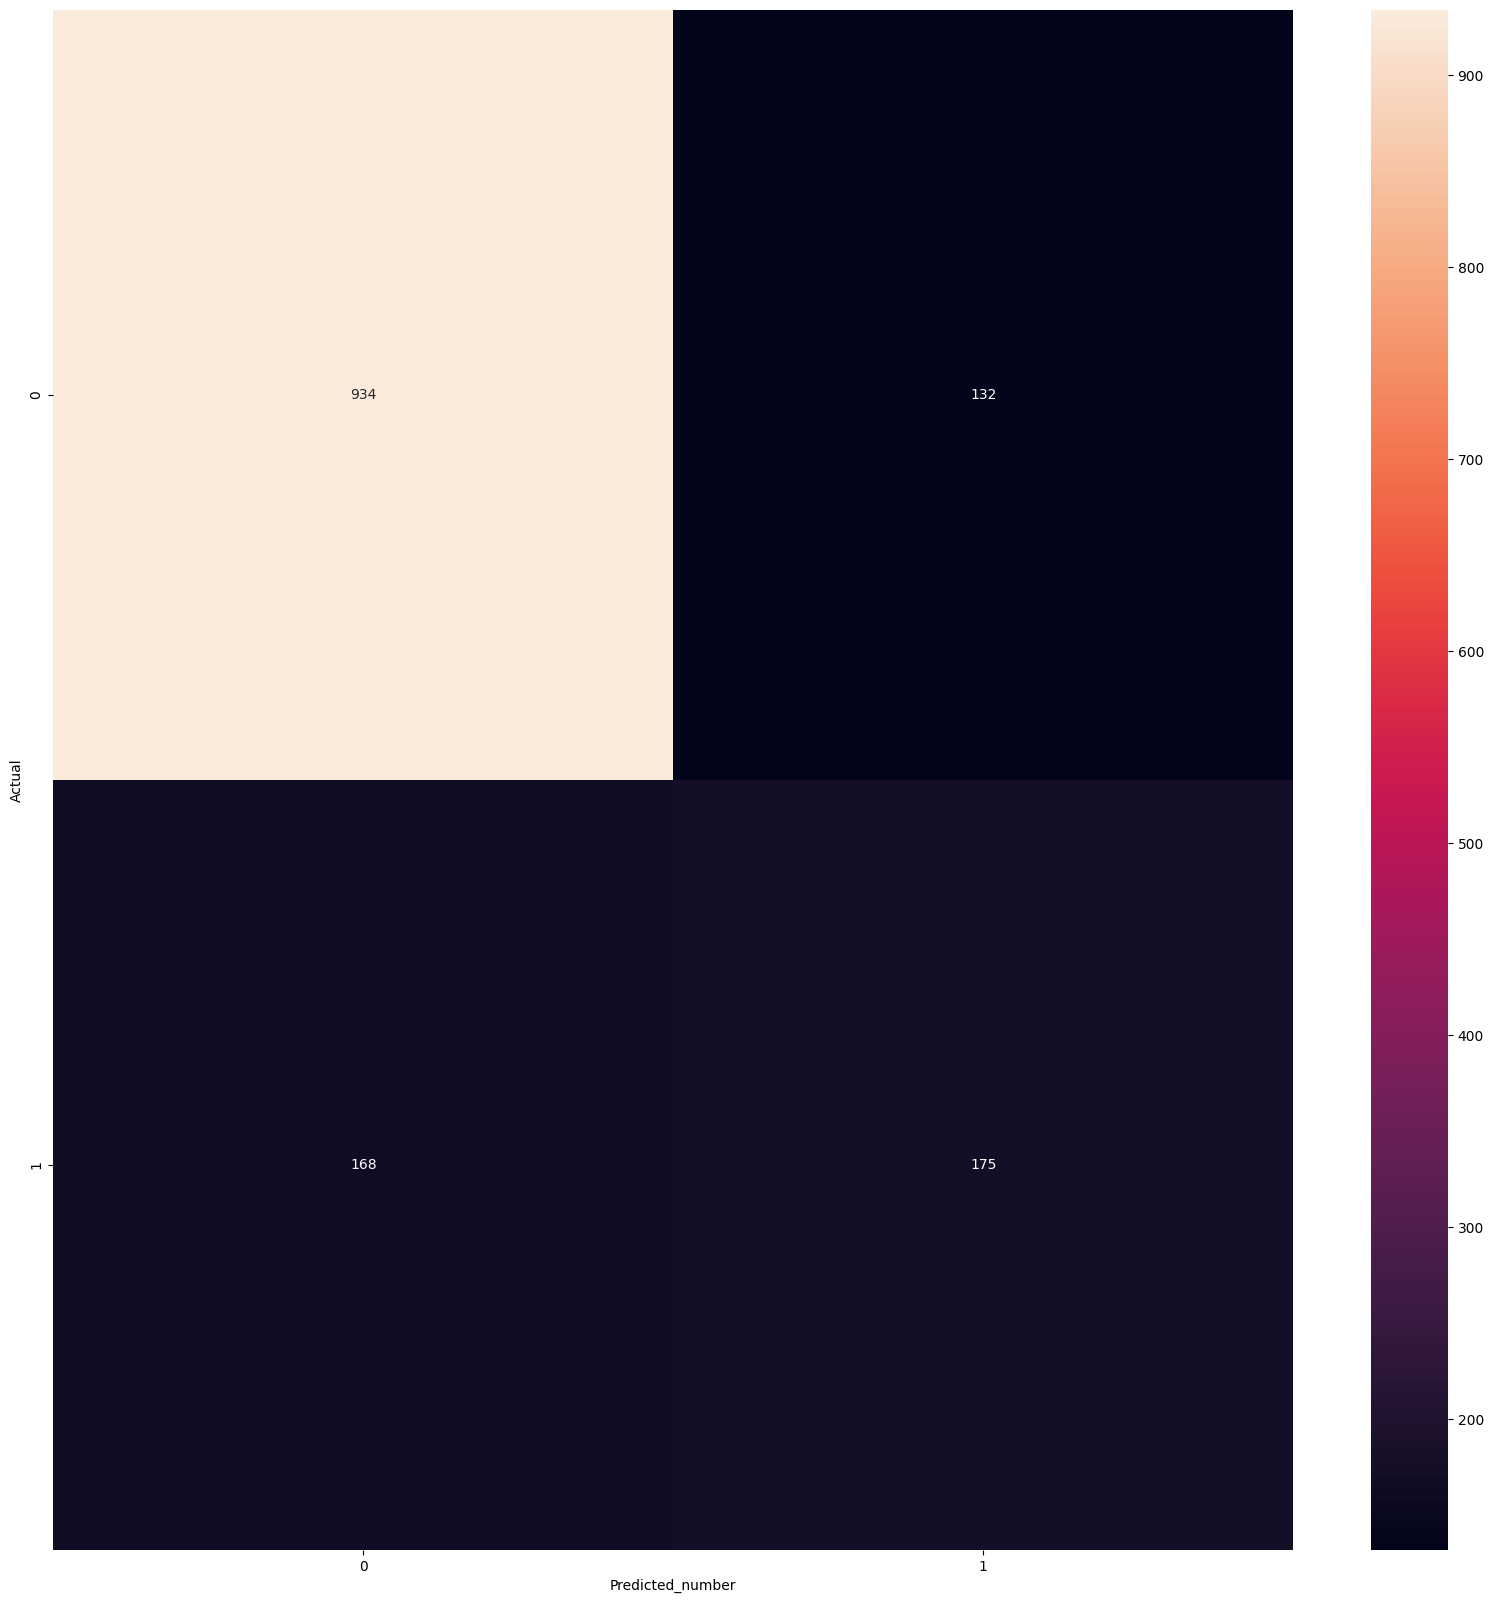

In [ ]:
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
# import tensorflow
import tensorflow as tf
#import seaborn
import seaborn as sb
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (20,20))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('Actual')

ANN implemented with about 80 percent accuracy.